In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

In [2]:
#===QUESTION 7===

In [3]:
mall_survey = pd.read_csv('http://people.fas.harvard.edu/~mparzen/stat100/smallsurvey.csv')

In [4]:
print ('Questions 7.a) and 7.b)')
print ('Rows:', mall_survey.shape[0])
print ('Variables (columns):', mall_survey.shape[1])

Questions 7.a) and 7.b)
Rows: 30
Variables (columns): 10


Question 7.c)


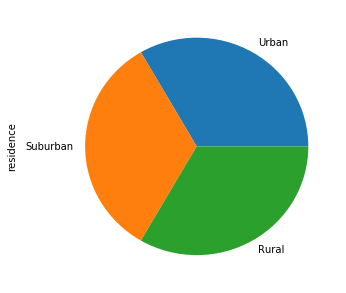

In [22]:
print ('Question 7.c)')
fig, ax = plt.subplots()
mall_survey['residence'].value_counts().plot.pie(figsize = (5, 5), ax = ax)
ax.yaxis.labelpad = 40

In [6]:
mall_survey['residence'].value_counts()

Urban       10
Suburban    10
Rural       10
Name: residence, dtype: int64

Question 7.d)


Text(0.5,1,'Political affiliation')

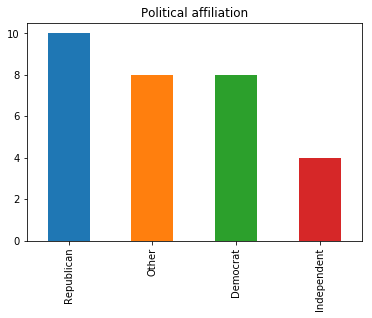

In [7]:
print ('Question 7.d)')
fig, ax = plt.subplots()
mall_survey['politicalparty'].value_counts().plot(kind = 'bar', ax = ax)
ax.set_title('Political affiliation')

In [8]:
mall_survey['politicalparty'].value_counts()

Republican     10
Other           8
Democrat        8
Independent     4
Name: politicalparty, dtype: int64

In [9]:
print ('Question 7.e)')
print ('Mean income is ${}.'.format(mall_survey['income'].mean()))

Question 7.e)
Mean income is $45.4.


In [26]:
print ('Question 7.f)')
#Using method from class
print ('Male mean income is ${} and has std {}'.format(mall_survey[mall_survey['gender'] == 'M']['income'].mean(), mall_survey[mall_survey['gender'] == 'M']['income'].std()))
print ('Female mean income is ${} and has std {}'.format(mall_survey[mall_survey['gender'] == 'F']['income'].mean(), mall_survey[mall_survey['gender'] == 'F']['income'].std()))
#To produce table for HW
mall_survey.groupby('gender').agg({'income': ['mean', 'std']})

Question 7.f)
Male mean income is $53.4 and has std 15.546244378811055
Female mean income is $37.4 and has std 12.02259777015172


income           
         mean        std
gender                  
F        37.4  12.022598
M        53.4  15.546244

In [11]:
print ('Question 7.g)')
more_than_7 = mall_survey[mall_survey['jobhappy'] >= 8]['income'].mean()
less_than_4 = mall_survey[mall_survey['jobhappy'] <= 3]['income'].mean()
print ('Job happiness for someone with job satisfaction of 8 or greater: {}'.format(more_than_7))
print ('Job happiness for someone with job satisfaction of 3 or less: {}'.format(less_than_4))

Question 7.g)
Job happiness for someone with job satisfaction of 8 or greater: 37.25
Job happiness for someone with job satisfaction of 3 or less: 51.416666666666664


In [12]:
#===QUESTION 8===

In [13]:
cars_cr = pd.read_csv('http://people.fas.harvard.edu/~mparzen/stat100/cars10.csv')

In [14]:
print ('Question 8.a)')
meanprice = cars_cr['price'].mean()
print ('Mean car price is ${:,.2f}'.format(meanprice))

Question 8.a)
Mean car price is $6,165.26


In [15]:
print ('Question 8.b)')
medianprice = cars_cr['price'].median()
print ('Mean car price is ${:,.2f}'.format(medianprice))

Question 8.b)
Mean car price is $5,006.50


Question 8.c)


Text(0.5,0,'Car price')

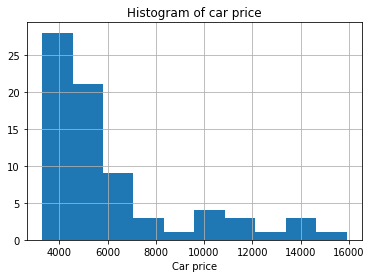

In [16]:
print ('Question 8.c)')
fig, ax = plt.subplots()
cars_cr['price'].hist()
ax.set_title('Histogram of car price')
ax.set_xlabel('Car price')

In [17]:
print ('Question 8.d)')
cars_cr.groupby('foreign').agg({'price': 'mean'})

Question 8.d)


,price
foreign,
Domestic,6072.423077
Foreign,6384.681818


In [18]:
print ('Question 8.e)')
cars_cr.groupby('foreign').agg({'mpg': ['max', 'min', 'mean', 'median', 'std', 'count']})

Question 8.e)


mpg                                      
         max min       mean median       std count
foreign                                           
Domestic  34  12  19.826923   19.0  4.743297    52
Foreign   41  14  24.772727   24.5  6.611187    22

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11745b4e0>,
      dtype=object)

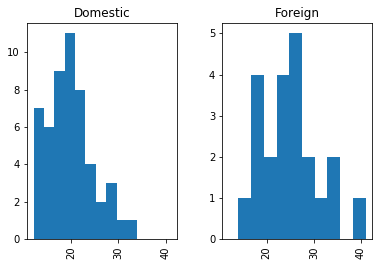

In [19]:
cars_cr.hist(column = 'mpg', by = 'foreign', sharex = True)

Question 8.f)


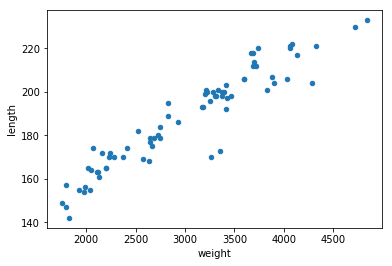

In [20]:
print ('Question 8.f)')
cars_cr.plot.scatter(x = 'weight', y = 'length')

In [27]:
#=== QUESTION 13 ===

In [30]:
print ('Question 13.b)')
blas = pd.read_csv('http://people.fas.harvard.edu/~mparzen/stat100/blas.csv')
blas.corr()

Question 13.b)


,X,Y
X,1.000000e+00,3.534593e-17
Y,3.534593e-17,1.000000e+00


Question 13.b)


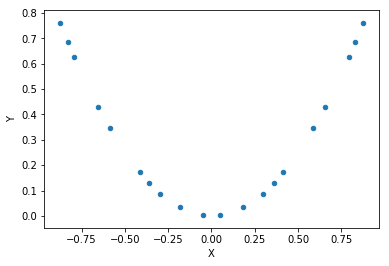

In [33]:
print ('Question 13.b)')
blas.plot.scatter(x = 'X', y = 'Y')

In [34]:
#=== QUESTION 15 ===

In [35]:
monthlyreturns = pd.read_csv('/Users/jbachlombardo/Documents/Personal/HES - Stats 104/Homeworks/Homework datasets/hw1_returns/hw1_monthlyreturns.csv')

In [50]:
print ('Question 15.b)')
reg_V_SPY = smf.ols('V ~ SPY', data = monthlyreturns).fit()
reg_JNJ_SPY = smf.ols('JNJ ~ SPY', data = monthlyreturns).fit()
reg_HD_SPY = smf.ols('HD ~ SPY', data = monthlyreturns).fit()
print ('V ~ SPY\n', reg_V_SPY.params, '\n')
print ('JNJ ~ SPY\n', reg_JNJ_SPY.params, '\n')
print ('HD ~ SPY\n', reg_HD_SPY.params)

Question 15.b)
V ~ SPY
 Intercept    0.00921
SPY          0.89222
dtype: float64 

JNJ ~ SPY
 Intercept    0.005108
SPY          0.615157
dtype: float64 

HD ~ SPY
 Intercept    0.002247
SPY          1.137143
dtype: float64


In [51]:
print ('Question 15.c)')
print ('S - V:', monthlyreturns['V'].std())
print ('S - JNJ:', monthlyreturns['JNJ'].std())
print ('S - HD:', monthlyreturns['HD'].std())

Question 15.c)
S - V: 0.04228078630710784
S - JNJ: 0.04107081852757267
S - HD: 0.05155322530518938


Question 15.e)


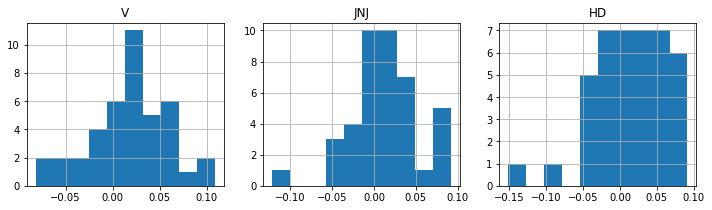

In [58]:
print ('Question 15.e)')
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12, 3))
monthlyreturns['V'].hist(ax = ax1)
ax1.set_title('V')
monthlyreturns['JNJ'].hist(ax = ax2)
ax2.set_title('JNJ')
monthlyreturns['HD'].hist(ax = ax3)
ax3.set_title('HD')
plt.show()

In [67]:
print ('Question 15.f)')
monthlyreturns['JNJHD'] = 0.5 * monthlyreturns['JNJ'] + 0.5 * monthlyreturns['HD']
monthlyreturns['JNJV'] = 0.5 * monthlyreturns['JNJ'] + 0.5 * monthlyreturns['V']
monthlyreturns['HDV'] = 0.5 * monthlyreturns['V'] + 0.5 * monthlyreturns['HD']
print ('JNJ + HD: average return = {}, standard deviation = {}'.format(monthlyreturns['JNJHD'].mean(), monthlyreturns['JNJHD'].std()))
print ('JNJ + V: average return = {}, standard deviation = {}'.format(monthlyreturns['JNJV'].mean(), monthlyreturns['JNJV'].std()))
print ('V + HD: average return = {}, standard deviation = {}'.format(monthlyreturns['HDV'].mean(), monthlyreturns['HDV'].std()))

Question 15.f)
JNJ + HD: average return = 0.012911763317073168, standard deviation = 0.03638304269029814
JNJ + V: average return = 0.015102135182926829, standard deviation = 0.03370790148755538
V + HD: average return = 0.016422449597560975, standard deviation = 0.041063265622848656


In [68]:
#=== QUESTION 16 ===

In [69]:
pizzasales = pd.read_csv('http://people.fas.harvard.edu/~mparzen/stat100/pizzasales1.csv')

In [78]:
print ('Question 16.a)')
pizza_model = smf.ols('sales ~ price', data = pizzasales).fit()
print (pizza_model.params)

Question 16.a)
Intercept    141865.531400
price        -24369.488336
dtype: float64


In [79]:
#=== QUESTION 17 ===

In [80]:
movinglabor = pd.read_csv('http://people.fas.harvard.edu/~mparzen/stat100/moving.csv')

Question 17.a)


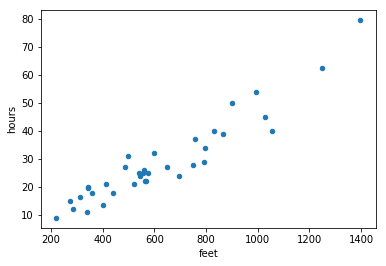

In [83]:
print ('Question 17.a)')
movinglabor.plot.scatter(x = 'feet', y = 'hours')

In [84]:
print ('Question 17.b)')
moving_model = smf.ols('hours ~ feet', data = movinglabor).fit()
moving_model.params

Question 17.b)


Intercept   -2.36966
feet         0.05008
dtype: float64

In [85]:
#=== QUESTION 18 ===

In [86]:
missingness = pd.read_csv('/Users/jbachlombardo/Documents/Personal/HES - Stats 104/Homeworks/Homework datasets/missing1.csv')

In [92]:
#alcohol
alcohol_missing = missingness['Heart.Health'][pd.isnull(missingness['Alcohol'])]
alcohol_not_missing = missingness['Heart.Health'][~pd.isnull(missingness['Alcohol'])]
#exercise
exercise_missing = missingness['Heart.Health'][pd.isnull(missingness['Exercise'])]
exercise_not_missing = missingness['Heart.Health'][~pd.isnull(missingness['Exercise'])]
#smoking
smoking_missing = missingness['Heart.Health'][pd.isnull(missingness['Smoke'])]
smoking_not_missing = missingness['Heart.Health'][~pd.isnull(missingness['Smoke'])]

In [98]:
table_data = {
    'Alcohol - Missing': [alcohol_missing.mean(), alcohol_missing.median(), alcohol_missing.std()],
    'Alcohol - Not missing': [alcohol_not_missing.mean(), alcohol_not_missing.median(), alcohol_not_missing.std()],
    'Exercise - Missing': [exercise_missing.mean(), exercise_missing.median(), exercise_missing.std()],
    'Exercise - Not missing': [exercise_not_missing.mean(), exercise_not_missing.median(), exercise_not_missing.std()],
    'Smoking - Missing': [smoking_missing.mean(), smoking_missing.median(), smoking_missing.std()],
    'Smoking - Not missing': [smoking_not_missing.mean(), smoking_not_missing.median(), smoking_not_missing.std()],
}

In [105]:
table = pd.DataFrame.from_dict(data = table_data, orient = 'index', columns = ['Mean', 'Median', 'Standard deviation'])
table

,Mean,Median,Standard deviation
Alcohol - Missing,47.788732,46.0,18.931392
Alcohol - Not missing,46.124865,45.0,20.596428
Exercise - Missing,53.035088,49.0,19.757426
Exercise - Not missing,45.832450,44.0,20.458947
Smoking - Missing,54.313131,53.0,20.511145
Smoking - Not missing,45.356271,44.0,20.291066


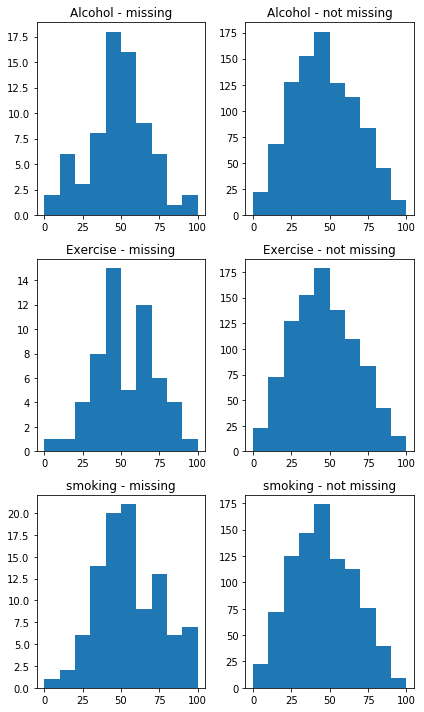

In [118]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (6, 10))
ax1.hist(alcohol_missing, range = [0, 100])
ax1.set_title('Alcohol - missing')
ax2.hist(alcohol_not_missing, range = [0, 100])
ax2.set_title('Alcohol - not missing')
ax3.hist(exercise_missing, range = [0, 100])
ax3.set_title('Exercise - missing')
ax4.hist(exercise_not_missing, range = [0, 100])
ax4.set_title('Exercise - not missing')
ax5.hist(smoking_missing, range = [0, 100])
ax5.set_title('smoking - missing')
ax6.hist(smoking_not_missing, range = [0, 100])
ax6.set_title('smoking - not missing')
plt.tight_layout()
plt.show()